In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# this tells seaborn and matplotlib to generate plots inline in the notebook
%matplotlib inline  

# these two lines allow you to control the figure size
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

inputs = input('Please enter a set of numbers: ')
print inputs

Populating the interactive namespace from numpy and matplotlib
Please enter a set of numbers: [16]
[16]


In [2]:
values = list(xrange(101))

import collections

concepts = collections.OrderedDict([
    ('even' , [x for x in values if x % 2 == 0]),
    ('odd' , [x for x in values if x % 2 == 1]),
    ('squares' , [x**2 for x in range(0,11)]),
    ('mult of 3', [x for x in values if x % 3 == 0]),
    ('mult of 4', [x for x in values if x % 4 == 0]),
    ('mult of 5', [x for x in values if x % 5 == 0]),
    ('mult of 6', [x for x in values if x % 6 == 0]),
    ('mult of 7', [x for x in values if x % 7 == 0]), 
    ('mult of 8', [x for x in values if x % 8 == 0]), 
    ('mult of 9', [x for x in values if x % 9 == 0]),
    ('mult of 10', [x for x in values if x % 10 == 0]),
    ('ends in 0', [x for x in values if x % 10 == 0]),
    ('ends in 1', [x for x in values if x % 10 == 1]),
    ('ends in 2', [x for x in values if x % 10 == 2]),
    ('ends in 3', [x for x in values if x % 10 == 3]),
    ('ends in 4', [x for x in values if x % 10 == 4]),
    ('ends in 5', [x for x in values if x % 10 == 5]),
    ('ends in 6', [x for x in values if x % 10 == 6]),
    ('ends in 7', [x for x in values if x % 10 == 7]),
    ('ends in 8', [x for x in values if x % 10 == 8]),
    ('ends in 9', [x for x in values if x % 10 == 9]),
    ('powers of 2', [2**x for x in values if 2**x <= 100]),
    ('powers of 3', [3**x for x in values if 3**x <= 100]),
    ('powers of 4', [4**x for x in values if 4**x <= 100]),
    ('powers of 5', [5**x for x in values if 5**x <= 100]),
    ('powers of 6', [6**x for x in values if 6**x <= 100]),
    ('powers of 7', [7**x for x in values if 7**x <= 100]),
    ('powers of 8', [8**x for x in values if 8**x <= 100]),
    ('powers of 9', [9**x for x in values if 9**x <= 100]),
    ('powers of 10', [10**x for x in values if 10**x <= 100]),
    ('all', values),
    ('powers of 2 + {37}', [2**x for x in values if 2**x <= 100] + [37]),
    ('powers of 2 - {32}', [2**x for x in values if 2**x <= 100 and x != 5])
])


33


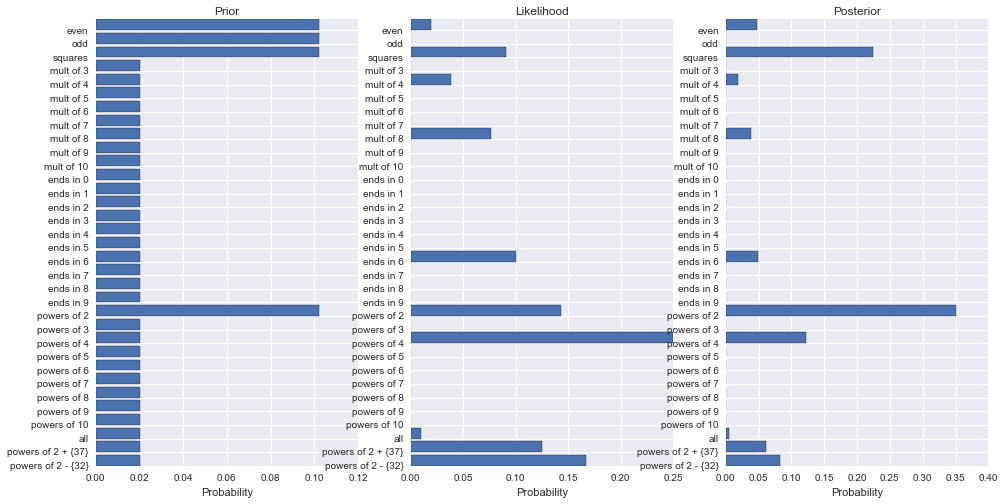

In [3]:
#Prior
y_pos = np.arange(len(concepts))
prior = collections.OrderedDict()
for key, value in concepts.items():
    if key in ['even', 'odd', 'squares', 'powers of 2']:
        prior[key]=float(5/49.0)
    else:
        prior[key]=float(1/49.0)

ax1 = plt.subplot(131)
y_keys = concepts.keys()
y_keys.reverse()
priorVals = prior.values()
priorVals.reverse()
plt.barh(y_pos, priorVals)
plt.yticks(y_pos, y_keys)
plt.title('Prior')
plt.xlabel('Probability')


#Likelihood
ax2 = plt.subplot(132, sharey=ax1)
likelihood = collections.OrderedDict()

#Math for Likelihood
for key, value in concepts.items(): #All Concepts
    if set(inputs) <= set(value):   
        #if likelihood[key] == 0:
        likelihood[key] = 1
        likelihood[key] = pow(1.0/len(value), len(inputs))
    else:
        likelihood[key]=0

likelihoodVals = likelihood.values()
likelihoodVals.reverse()
likelihoodKeys = likelihood.keys()
likelihoodKeys.reverse()

print len(likelihoodKeys)

plt.title('Likelihood')
plt.xlabel('Probability')
plt.barh(y_pos, likelihoodVals)

ax2 = plt.subplot(133, sharey=ax1)
posterior = collections.OrderedDict()
#
normalizer=0
#
for key, value in concepts.items():
    normalizer += prior[key]*likelihood[key]
    
for key, value in concepts.items():
    posterior[key]= prior[key]*likelihood[key]/normalizer

plt.title('Posterior')
plt.xlabel('Probability')
postVals = posterior.values()
postVals.reverse()
plt.barh(y_pos, postVals)
#
plt.show()

In [4]:
mostLikelyVal = 0;
mostLikelyName = '';

for m,n in posterior.iteritems():
    if n > mostLikelyVal:
        mostLikelyVal = n
        mostLikelyName = m
print "The most likely concept is: " + mostLikelyName + " at " + str(mostLikelyVal)



The most likely concept is: powers of 2 at 0.351203538786


In [9]:
predict =[]
for x in range(0, 101):
    member = [m for m,n in concepts.iteritems() if x in n]
    predict.append(sum([n for m,n in posterior.iteritems() if m in member])) 

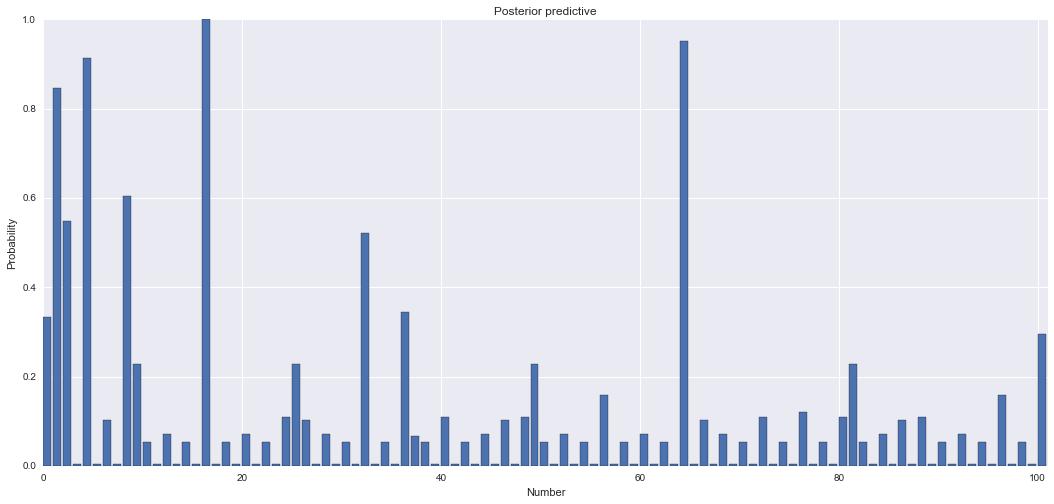

In [11]:
pylab.rcParams['figure.figsize'] = (18.0, 8.0)
plt.bar(range(len(predict)), predict)
plt.xlim(0,101)
plt.ylim(0,1.0)
plt.title('Posterior predictive')
plt.ylabel('Probability')
plt.xlabel('Number')
plt.show()